# Blood Cell Detection and Classification
--- 

## 初始化

In [29]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import os
import shutil
import xml.etree.ElementTree as ET

下載資料集

In [30]:
if not os.path.exists('./blood-cells/'):
    path = kagglehub.dataset_download('paultimothymooney/blood-cells')
    print(f"Dataset downloaded to {path}")
    d = './blood-cells/'
    if os.path.isdir(path):
        shutil.copytree(path, d)
    print(f"Dataset setup completed.")
else:
    print("Dataset already exists.")

Dataset already exists.


## Classification

資料樣本

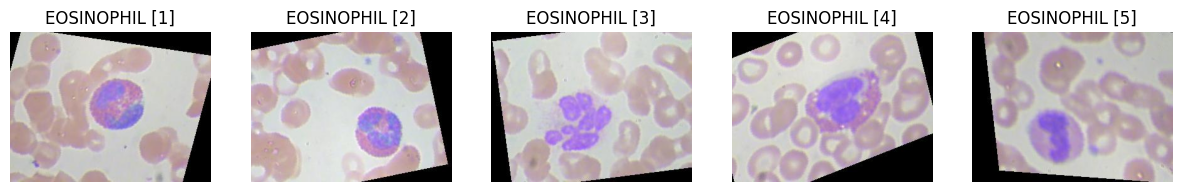

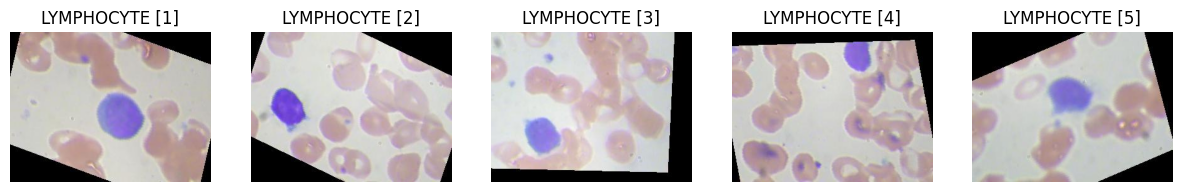

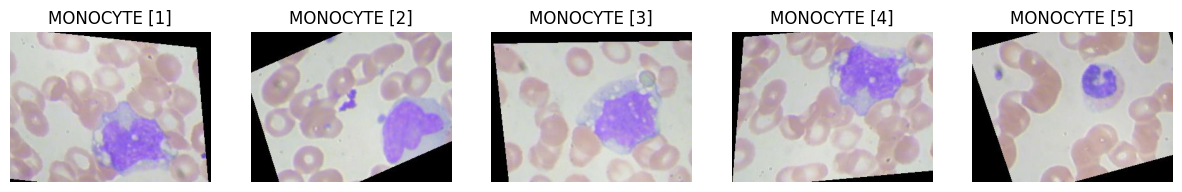

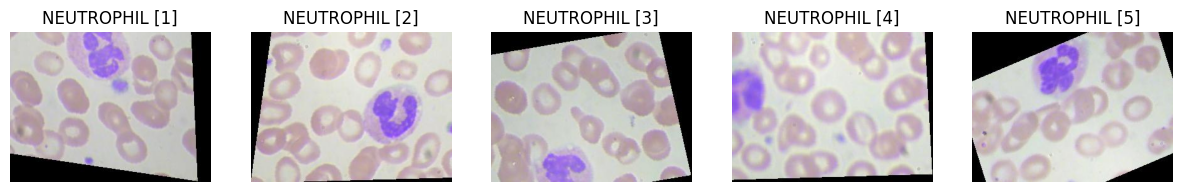

In [31]:
cell_types = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']
path = './blood-cells/dataset2-master/dataset2-master/images/TRAIN/'

for cell_type in cell_types:
    sample_images = os.listdir(path + cell_type)[:5]
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(sample_images):
        img_path = path + cell_type + '/' + img_name
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f'{cell_type} [{i+1}]')
        plt.axis('off')
    plt.show()

## Detection

資料樣本

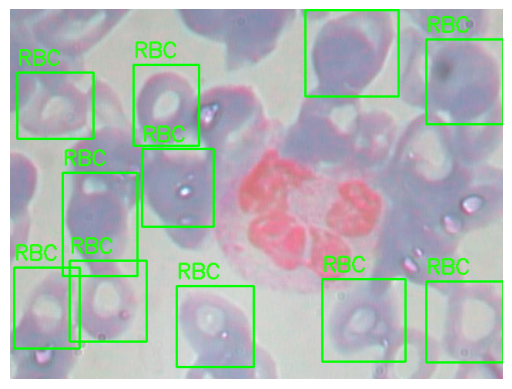

In [35]:
image_dir = './blood-cells/dataset-master/dataset-master/JPEGImages/'
annot_dir = './blood-cells/dataset-master/dataset-master/Annotations/'

image_index = '00000'
annotation_path = annot_dir + f'BloodImage_{image_index}.xml'
original_image_path = image_dir + f'BloodImage_{image_index}.jpg'

plt.axis('off')

# Original Image
img = cv2.imread(original_image_path)

# Draw Bounding Boxes
tree = ET.parse(annotation_path)
root = tree.getroot()
obj_count = len(root.findall('object'))
for obj in root.findall('object'):
    bbox = obj.find('bndbox')
    name = str(obj.find('name').text)
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)
    cv2.putText(img, name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

plt.imshow(img)